# Assignment 4 - Scraping and Textual Analysis


For this assignment I will scrape a  popular online fantasy series that is by now spanning a massive amount of over 550 chapters and analyse the entries for determining their features. For this analysis I will look more closely at the first book and see if I can determine some details about it's structure.
PS: Since the scraping a long time, I would advise against replicating the first step and just taking it on faith when correcting it. For this the data is stored in a pickle file.

In [57]:
import requests
import os
import bs4
import re
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install goose3
from goose3 import Goose
import pickle
!pip install wordcloud

In [4]:
names = []
chapters = []
url = 'https://wanderinginn.com/table-of-contents/' 
res = requests.get(url)
res.raise_for_status()
soup = bs4.BeautifulSoup(res.text, 'html.parser')
chapter_links = soup.find('div', class_='entry-content')
for a in chapter_links.find_all('a', href=True):
            url1 = (a['href'])
            res = requests.get(url1)
            res.raise_for_status()
            soup = bs4.BeautifulSoup(res.text,'lxml')
            seriesElem = soup.find('div', class_='entry-content')   
            chapter = seriesElem.get_text()
            g = Goose()              
            article = g.extract(url=url1)
            name = article.title
            names.append(name)
            chapters.append(chapter)
#            with open('Wandering_Inn.txt', mode='a', encoding='utf-8') as f:
#            f.write('%s' % name)
#            f.write(chapter)
#            f.close()
            if name == '1.45':
                break
            print(name)

1.00
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.10
1.11
Interlude
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.20
Interlude – 1.00 R
1.01 R
1.21
1.22
1.23
Interlude – King Edition
1.24
1.02 R
1.03 R
1.25
1.26
1.27
1.04 R
1.05 R
1.28
1.06 R
1.29
1.30
1.31
1.07 R
1.08 R
1.32
1.33
1.09 R
1.10 R
1.34
1.35
1.11 R
1.12 R
1.36
1.37
1.38
1.39
1.40
1.13 R
1.41
1.00 H
1.01 H
1.02 H
1.42
1.43
1.44


In [6]:
text_zip = zip(names, chapters)
text = dict(text_zip)
pickle.dump( text, open( "data.p", "wb" ) )

In [7]:
text = pickle.load( open( "data.p", "rb" ) )

In [8]:
text['1.02'][0:1000]

'\nThe inn was dark. That was because the world was dark, at least for the moment. Two moons hung in the sky, one light blue, the other pale yellow. But their soft light was obscured by a shifting layer of clouds overhead. Thus, light was scarce. Which made sense.\nIt was nighttime.\nHowever, despite the late hour one figure moved restlessly around the room. A young woman. Her progress left a trail in the dust as she walked around the room. She paced from wall to wall, muttering to herself. Then she tripped over a chair.\n“Ow.”\nErin brushed dust off her pants and t-shirt in disgust. Well, her clothes were officially dirty now. Parts of her t-shirt were burned black, and her jeans had been cut by the Goblin’s knives. But that wasn’t important at the moment.\n“Did I just level up?”\nErin stared up at the ceiling from her fallen position. She could have stood up, but that would have required effort. And besides, Erin was hungry, tired, and confused. Lying on the floor made her feel bette

#### The dictionary is currently still in key: name, value: list of text format and needs to be processed further, idealy into a dataframe.

In [9]:
def combine_text(list_of_text):
    combined_text = ''.join(list_of_text)
    return combined_text

In [10]:
text_combined = {key: [combine_text(value)] for (key, value) in text.items()}

In [11]:
text_df = pd.DataFrame.from_dict(text_combined).transpose()
text_df.columns = ['Chapter']
text_df

,Chapter
1.00,"\nThe inn was dark and empty. It stood, silent..."
1.01,"\nAfter a few minutes, the traveler sat back u..."
1.02,\nThe inn was dark. That was because the world...
1.03,\nErin found a stream running idyllically down...
1.04,\nThe young woman sat in a chair and pondered....
...,...
1.02 H,\n“What about this room?”\n“Empty.”\nSostrom s...
1.42,"\nErin sat in her inn, staring at the table. S..."
1.43,\nWhy do the dead try to kill the living? Is i...
1.44,\nShe knew when the first skeleton cut her tha...


#### Now for some data cleaning.

In [12]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub('previous chapter', ' ', text)
    text = re.sub('next chapter', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('–', ' ', text)
    text = re.sub('—', ' ', text)
    return text
round1 = lambda x: clean_text_round1(x)

In [13]:
pd.set_option('max_colwidth',270)
text_clean = pd.DataFrame(text_df.Chapter.apply(round1))
text_clean

,Chapter
1.00,the inn was dark and empty it stood silent on the grassy hilltop the ruins of other structures around it rot and age had brought low other buildings the weather and wildlife had reduced stone foundations to rubble and stout wooden walls to a few rotten pieces ...
1.01,after a few minutes the traveler sat back up no not a traveler she hadn t intended to travel anywhere tonight the young woman frowned as she rubbed at her face she d been going to the bathroom and she must have taken a wrong step somewhere a really big wrong s...
1.02,the inn was dark that was because the world was dark at least for the moment two moons hung in the sky one light blue the other pale yellow but their soft light was obscured by a shifting layer of clouds overhead thus light was scarce which made sense it wa...
1.03,erin found a stream running idyllically down a hill a few hundred feet away from the inn its position and relative size meant that it was the perfect place for her to gather water or even wash herself should the need arise all things considered it was a windfall ...
1.04,the young woman sat in a chair and pondered it seemed stupid no it was stupid but there could be only one explanation when you level in dreams you level in real life erin thought about that for a moment huh she sat in the chair for a few more minutes those...
...,...
1.02 H,what about this room empty sostrom shook his head as he walked out of another dark room his staff glowing calruz stomped out behind him growling irately ceria tried not to scowl at her friend but it was hard not a thing you can see for yourself sostrom ...
1.42,erin sat in her inn staring at the table she didn t have anything better to do normally she served customers chatted or played chess but she couldn t today they were all gone pawn had left for the city with the other workers promising to come back tomorrow h...
1.43,why do the dead try to kill the living is it hatred do they seek to defile the living to drag them into the same unending torment of their lives do they envy those who still draw breath or is it a greater mystery do the undead simply want others to join them t...
1.44,she knew when the first skeleton cut her that she was going to die erin stared down at the open skin on her arm and wondered if she could push the two red halves together she raised the frying pan and hit the skeleton with all her strength it fell down erin kicke...


In [15]:
text_clean.Chapter.loc['1.01'] [0:1000]

'after a few minutes  the traveler sat back up  no  not a traveler  she hadn t intended to travel anywhere tonight  the young woman frowned as she rubbed at her face  she d been going to the bathroom and she must have taken a wrong step somewhere a really big wrong step  because instead of walking into her bathroom and seeing the comforting sight of porcelain  she s suddenly found herself in a cave  nose to nose with a dragon the young woman shot to her feet  heart pounding  she looked around and remembered she was in the inn  but the memory was fresh  and her burned arm she felt at it and winced  this is no dream  but it felt like one  it felt like she was in a dream  because that would be so much easier to explain than reality  the reluctant traveler took a deep breath  and then another  and coughed  dusty  ahem  she tried to rationalize what was happening  first things first  who am i  i m erin  check  we re off to a good start  she smiled weakly  that s right  her name was erin  er

##### Looks good to go, we shall procede!

### Let's find the most common words!

In [46]:
textmash = text_clean['Chapter'].sum()
textmash = textmash.split()
stop_en = nltk.corpus.stopwords.words('english')
textmash = [l for l in textmash if l not in stop_en]
textmash[0:10]

['inn',
 'dark',
 'empty',
 'stood',
 'silent',
 'grassy',
 'hilltop',
 'ruins',
 'structures',
 'around']

In [47]:
freqdist = Counter(textmash)

In [48]:
freqdist.most_common(50)

[('erin', 3894),
 ('one', 1475),
 ('like', 1238),
 ('ryoka', 1167),
 ('back', 1165),
 ('would', 958),
 ('could', 931),
 ('looked', 886),
 ('around', 849),
 ('head', 806),
 ('stared', 768),
 ('even', 751),
 ('ceria', 742),
 ('still', 705),
 ('well', 652),
 ('something', 636),
 ('know', 614),
 ('time', 609),
 ('away', 587),
 ('inn', 575),
 ('good', 562),
 ('get', 549),
 ('relc', 549),
 ('right', 544),
 ('eyes', 520),
 ('hand', 516),
 ('two', 509),
 ('klbkch', 507),
 ('really', 483),
 ('way', 475),
 ('adventurers', 471),
 ('another', 465),
 ('see', 445),
 ('made', 443),
 ('face', 440),
 ('calruz', 435),
 ('got', 428),
 ('pisces', 417),
 ('go', 414),
 ('goblins', 413),
 ('skeleton', 406),
 ('saw', 400),
 ('felt', 395),
 ('want', 392),
 ('nodded', 390),
 ('city', 387),
 ('oh', 379),
 ('much', 377),
 ('turned', 370),
 ('goblin', 362)]

A lot of these are names of reoccuring characters, but throught this the general theme of the narrativ already becomes apparent.

In [51]:
clean = ' '.join(textmash)
clean[0:1000]

'inn dark empty stood silent grassy hilltop ruins structures around rot age brought low buildings weather wildlife reduced stone foundations rubble stout wooden walls rotten pieces timber mixed ground inn still stood waiting sentient thinking way way buildings wait waiting someone find purpose inn someone find young woman stumbled grass hill knees shaking gasping air lungs burned right arm burned smoke still rising charred fabric one shoulder legs bleeding several shallow cuts torn open pants back legs still climbed hill inn mistaking despite years building stood among rest ruins mostly untouched passage time construction inn superior buildings perhaps something else kept standing regardless attracted young woman merely thought inn every world inn symbol place meet rest meeting point epic quests could begin inn hearth fire warm glow night beacon weary hungry desperate inn dark signboard inn rotted years worn whatever name held away long ago windows dark shuttered girl traveler nowhere 

### Wordcloud

In [56]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(cleaned)

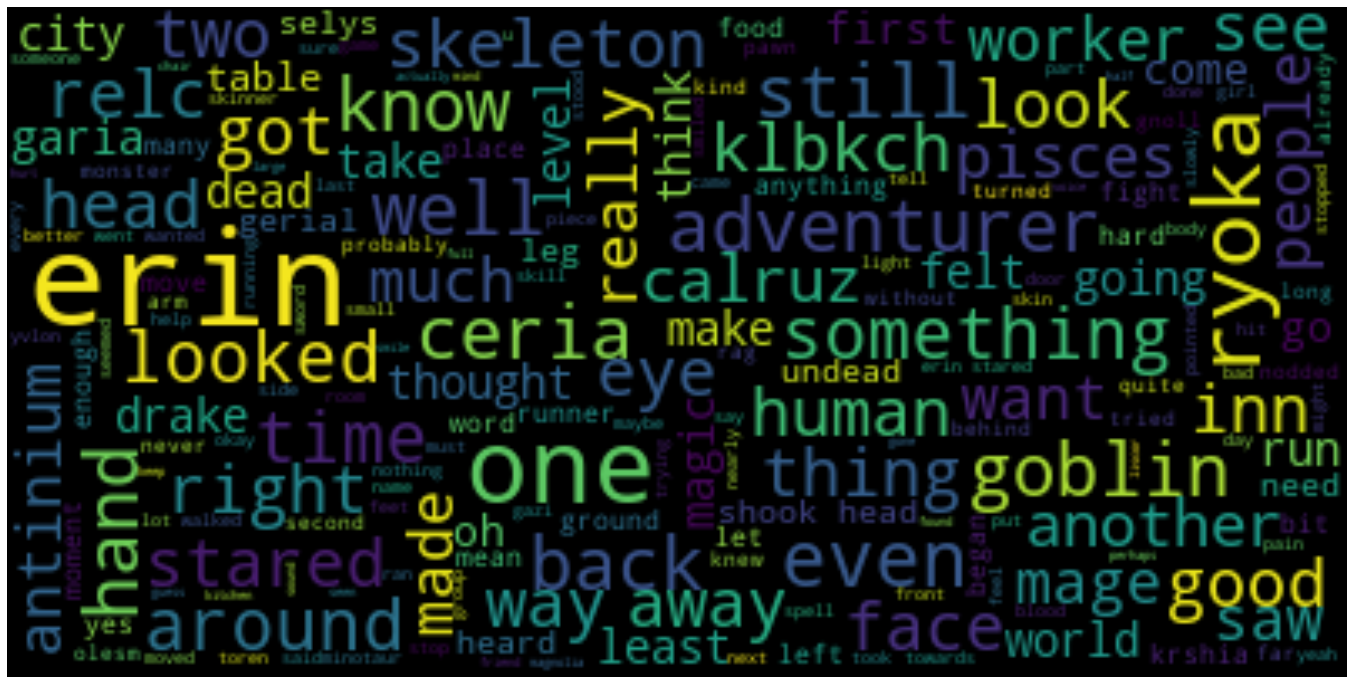

<Figure size 432x288 with 0 Axes>

In [63]:
wordcloud = WordCloud(max_font_size=40).generate(clean)
plt.figure(figsize=(24, 24))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('pic.png', bbox_inches='tight')

A couple of things become apparent from this:
    .) Just how character driven this novel is. Many of the most frequent works are the names and races of the related characters.
       This reinforces my impression that the tension carrying the narrative mainly arises out of interactions involving differences in 
       cultural or societal interests at odds with one another.(klbkch, erin, ryoka, garia, ceria, olesm, relc, calruz, selys, krisha - drake,
       human, undead, goblin, gnoll, minotaur, antinium, pisces or nicely summarized by the also prominent "people")
    .) Also readily apparent here is that this is a work of fantasy fiction which entails a certain mindset of wonder and discovery. Many of
       the key terms for this encompass the notion that something transcends the mundane, most often through the use of things forgotten, 
       dispossessed or foraged for; be it through research, plundering or exploration.(skeleton, undead, goblin, magic, mage, adventurer, 
       monster)
    .) This focus is supplemented with an aspect of travel. ( moved, walk, run, running, inn, went, time, halt, world, left, came, going)
    .) It can also be infered from this that the author is a visual person with an empathetic streak, favoring to explore emotional 
       expressions throught physical and kinestetic means. (stared, see, saw, eye, head, face, shook head, nodded, skin, body, arm, leg, move
       or more generally want, need, think, thought, knew)
    .) The eponymous inn with all its attributes, encompassing a shared public space in which social boundaries are crossed, many different
       societal and racial strata meet, foreigners and travelers submit to an extrajuridical set of norms and forms of conduct. The inn is a 
       transient space outside of normal conduct 
       and the classical terms associated with them tie all of the former points on its rich room of possibilities together, offering a 
       spledid example for Michel Foucaults concept of Heterotopia.(table, food, plate, inn, left, came, going, place, moment, time, second, 
       moment)

#### Unique words:

In [66]:
unique = [w for w in textmash if w not in 'unique']
len(unique)

171729

#### Sentiment Analysis:

In [75]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

text_clean['polarity'] = text_clean.Chapter.apply(pol)
text_clean['subjectivity'] = text_clean.Chapter.apply(sub)

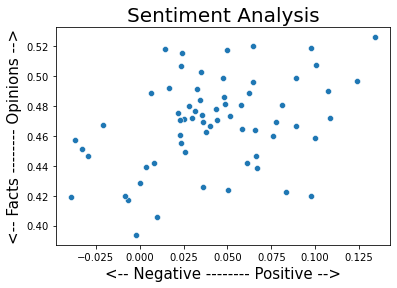

In [77]:
sns.scatterplot(data=text_clean, x="polarity", y="subjectivity")
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

There seems to be a faint trend, let's look further into this.

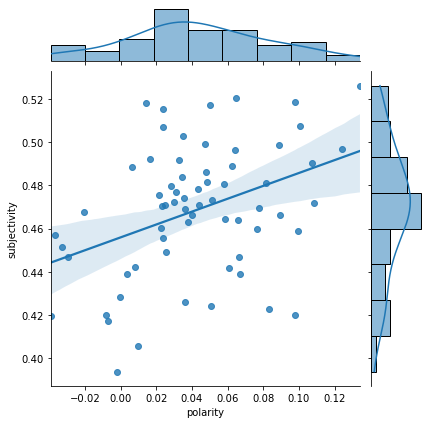

In [78]:
sns.jointplot(x='polarity', y='subjectivity', data=text_clean, kind='reg')

Both seem to have risen silightly over the course of the narrative and are definately correlated.

#### Pointwise Mutual Information

In [ ]:
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim

In [108]:
max_items = 50
freq_min_b = 10
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(textmash)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print(a, b)

muay thai
martial arts
raiding party
seed cores
dustrag dustrag
frying pan
wistram academy
ice cream
cleared throat
seed core
crypt lords
men women
exchanged glance
crypt lord
shield spiders
gritted teeth
vice captain
senior guardsman
silver spears
high pitched
bared teeth
horns hammerad
high passes
deep breath
young woman
healing potions
rock crab
tables chairs
healing potion
silver rank
glass jar
blood fields
blue fruits
acid flies
glass jars
half elf
ant man
gold coins
mana potions
years ago
folded arms
market street
lady magnolia
blue fruit
gold rank
ten minutes
leaned forwards
drakes gnolls
blue juice
acid fly


Many of these terms are specific terms connotated within the narrative, but some reflect the associations already explored through the world cloud.

In [113]:
max_items = 50
freq_min_t = 6
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(textmash)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print(a, b, c)

dustrag dustrag dustrag
members horns hammerad
took deep breath
pointed trembling finger
blue fruit juice
individual known pawn
innkeeper level skill
innkeeper solstice must
erin gritted teeth
play game chess
ceria half elf
common room inn
raised one eyebrow
leaned back chair
play another game
made feel better
ceria raised wand
back common room
took one step
took step back
sat back chair
krshia shook head
erin pretty sure
put head hands
erin took deep
erin opened mouth
erin eyes narrowed
gerial shook head
took one look
ceria shook head
erin scratched head
pisces shook head
erin waved hands
klbkch shook head
garia could see
erin closed eyes
erin sat chair
ryoka shook head
looked around room
raised one hand
looked around saw
erin opened door
either way erin
slowly erin walked
walked back inn
back towards inn
erin shook head
looked around inn
erin looked around
erin sat inn


In [114]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(textmash, n)
xgrams_counter = Counter(xgrams)
xgrams_counter.most_common(20)

[(('dustrag', 'dustrag', 'dustrag', 'dustrag'), 9),
 (('erin', 'sat', 'back', 'chair'), 5),
 (('stared', 'erin', 'stared', 'back'), 5),
 (('erin', 'took', 'deep', 'breath'), 4),
 (('erin', 'looked', 'around', 'saw'), 4),
 (('vice', 'captain', 'horns', 'hammerad'), 4),
 (('frying', 'pan', 'jar', 'acid'), 4),
 (('erin', 'put', 'head', 'hands'), 3),
 (('water', 'water', 'water', 'water'), 3),
 (('erin', 'took', 'deep', 'breaths'), 3),
 (('erin', 'took', 'one', 'look'), 3),
 (('dark', 'shape', 'lies', 'floor'), 3),
 (('check', 'check', 'check', 'check'), 3),
 (('street', 'runners', 'city', 'runners'), 3),
 (('took', 'another', 'step', 'back'), 3),
 (('magnolia', 'clapped', 'hands', 'together'), 3),
 (('oh', 'god', 'oh', 'god'), 3),
 (('door', 'opened', 'erin', 'turned'), 3),
 (('erin', 'sat', 'inn', 'staring'), 3),
 (('dammit', 'dammit', 'dammit', 'dammit'), 3)]

This already allows for some better understanding of the narrative without having any previous knowledge about it. Also expressing some of the monotonous hardship depicted.

## Topic Modeling

If you think that you would at any point want to read this, I would advise you to not read the analysis for the topic modeling, because there are spoilers in it.

In [137]:
stop_1 = nltk.corpus.stopwords.words('english') 
stop_append = ['one', 'like', 'would', 'around', 'back', 'head', 'hand', 'even', 'could', 'looked', 'something', 'stared']
stop = stop_1 + stop_append

In [138]:
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(df):
    corpus = []
    stem = nltk.stem.PorterStemmer()
    lem = nltk.stem.WordNetLemmatizer()
    for segment in df['Chapter']:
        words=[w for w in nltk.tokenize.word_tokenize(segment) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

corpus = preprocess_text(text_clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [139]:
import gensim
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [140]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 6, id2word = dic, passes = 30, workers = 2,  per_word_topics=True)
lda_model.show_topics()

[(0,
  '0.008*"ceria" + 0.007*"undead" + 0.006*"dead" + 0.006*"skinner" + 0.005*"adventurer" + 0.005*"towards" + 0.004*"time" + 0.004*"zevara" + 0.004*"ran" + 0.004*"away"'),
 (1,
  '0.044*"erin" + 0.010*"goblin" + 0.007*"inn" + 0.006*"still" + 0.005*"felt" + 0.005*"eye" + 0.005*"fruit" + 0.005*"door" + 0.004*"away" + 0.004*"time"'),
 (2,
  '0.015*"erin" + 0.011*"ryoka" + 0.006*"know" + 0.005*"well" + 0.005*"magic" + 0.005*"ceria" + 0.004*"adventurer" + 0.004*"still" + 0.004*"time" + 0.004*"way"'),
 (3,
  '0.044*"erin" + 0.010*"relc" + 0.009*"klbkch" + 0.007*"goblin" + 0.006*"worker" + 0.006*"drake" + 0.006*"pawn" + 0.005*"good" + 0.005*"human" + 0.005*"inn"'),
 (4,
  '0.009*"ceria" + 0.006*"leg" + 0.006*"necromancer" + 0.006*"cart" + 0.005*"pisces" + 0.005*"ryoka" + 0.004*"bone" + 0.004*"pain" + 0.003*"carriage" + 0.003*"gerial"'),
 (5,
  '0.038*"ryoka" + 0.014*"runner" + 0.011*"garia" + 0.011*"adventurer" + 0.009*"ceria" + 0.008*"calruz" + 0.008*"yvlon" + 0.006*"fals" + 0.005*"get" +

# SPOILER ALERT!

The strongest narrative threads of the first book are here already apparent:

 0) Conflict between adventurers and the undead.
 1) The inn owner Erin having goblins for patrons and the conflict it brings.
 2) The merging of two narrative threads and a reunion.
 3) The interaction between Erin and a drake city and it's guards.
 4) The crisis of Ryoka's leg injury and the quest on a cart to let it be healed by a necromancer.
 5) Ryokas employment as a courier running from city to city as a "runner" to deliver goods.